In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from anomaly_detection import config
from anomaly_detection import dataset

# set seed for reproducibility
np.random.seed(42)

In [5]:
file_path = '/Users/emadchelhi/Desktop/git_repos/Why-anomalous/data/raw/Wholesale customers data.csv'

In [7]:
# load the data
tab_df = dataset.load_data(file_path)

Data successfully loaded from /Users/emadchelhi/Desktop/git_repos/Why-anomalous/data/raw/Wholesale customers data.csv.


In [8]:
tab_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [9]:
tab_df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [10]:
tab_df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [11]:
tab_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


/Users/emadchelhi/miniconda3/envs/Why-anomalous/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fresh', ylabel='Count'>

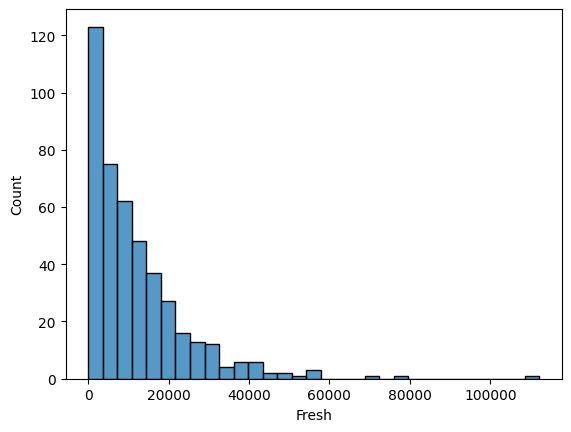

In [12]:
sns.histplot(tab_df['Fresh'])

/Users/emadchelhi/miniconda3/envs/Why-anomalous/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Milk', ylabel='Count'>

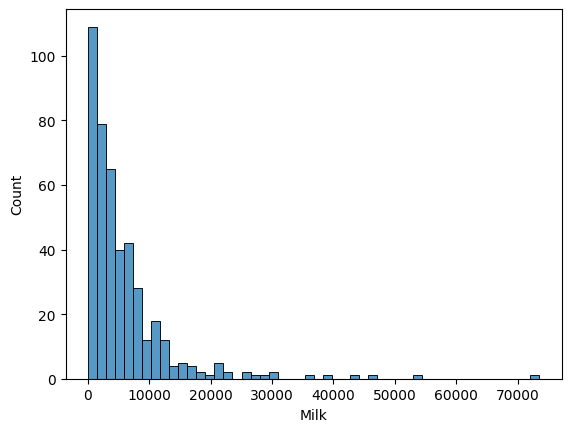

In [13]:
sns.histplot(tab_df['Milk'])

/Users/emadchelhi/miniconda3/envs/Why-anomalous/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Grocery', ylabel='Count'>

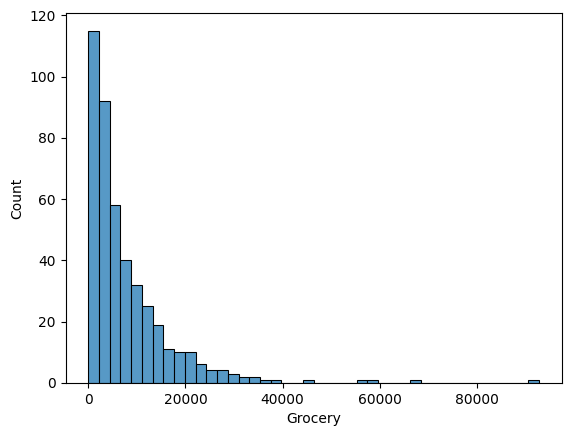

In [14]:
sns.histplot(tab_df['Grocery'])

/Users/emadchelhi/miniconda3/envs/Why-anomalous/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Frozen', ylabel='Count'>

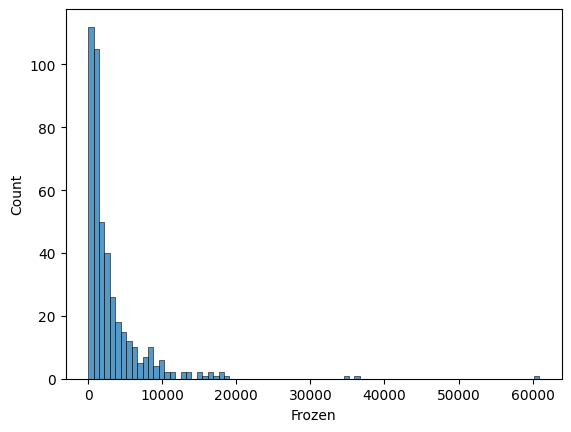

In [15]:
sns.histplot(tab_df['Frozen'])

/Users/emadchelhi/miniconda3/envs/Why-anomalous/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Detergents_Paper', ylabel='Count'>

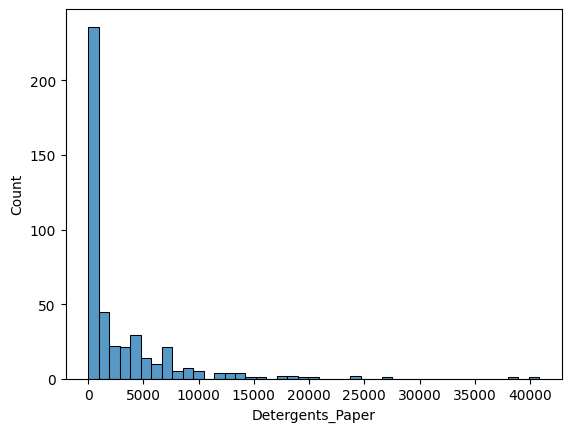

In [16]:
sns.histplot(tab_df['Detergents_Paper'])

/Users/emadchelhi/miniconda3/envs/Why-anomalous/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Delicassen', ylabel='Count'>

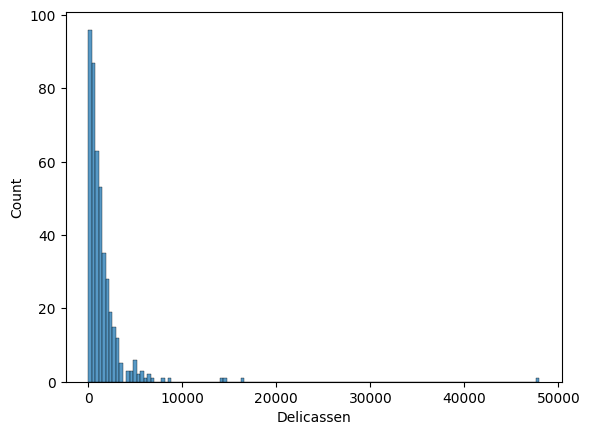

In [17]:
sns.histplot(tab_df['Delicassen'])

In [18]:
channel_list=list(tab_df["Channel"].value_counts().items())
print(channel_list)

[(1, 298), (2, 142)]


<Axes: title={'center': 'Channel'}, ylabel='Frequency'>

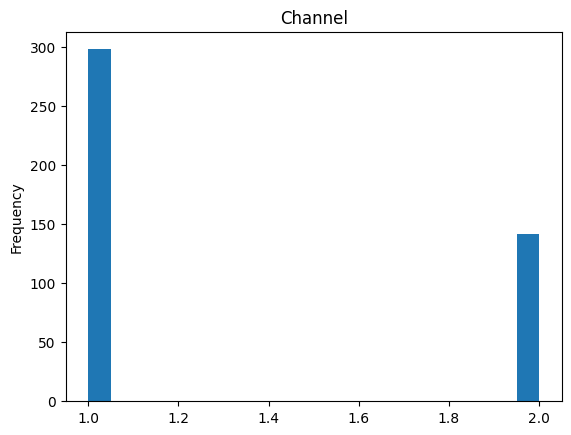

In [19]:
tab_df['Channel'].plot(kind='hist', bins=20, title='Channel')

In [20]:
region_list=list(tab_df["Region"].value_counts().items())
print(region_list)

[(3, 316), (1, 77), (2, 47)]


<Axes: title={'center': 'Region'}, ylabel='Frequency'>

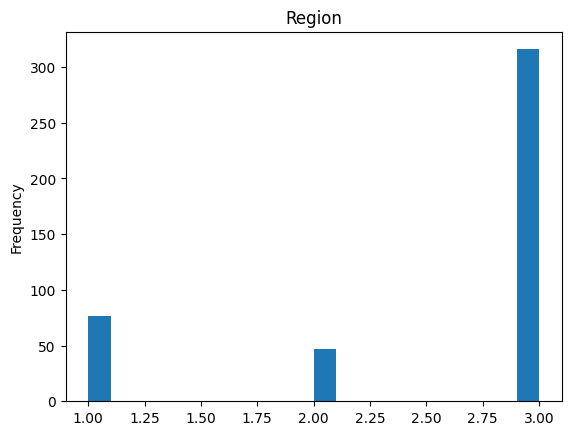

In [21]:
tab_df['Region'].plot(kind='hist', bins=20, title='Region')

Most of our records come from region 3. Most of our conclusions will refer particularly on clients of this region, careful with all generalization in the future descriptions.

Anyway for our objectives we don't need these last 2 categorical features.


In [22]:
del tab_df['Channel']
del tab_df['Region']

/Users/emadchelhi/miniconda3/envs/Why-anomalous/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/emadchelhi/miniconda3/envs/Why-anomalous/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/emadchelhi/miniconda3/envs/Why-anomalous/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/emadchelhi/miniconda3/envs/Why-anomalous/lib/python3.12/site-packages/seaborn/_oldcore.py:111

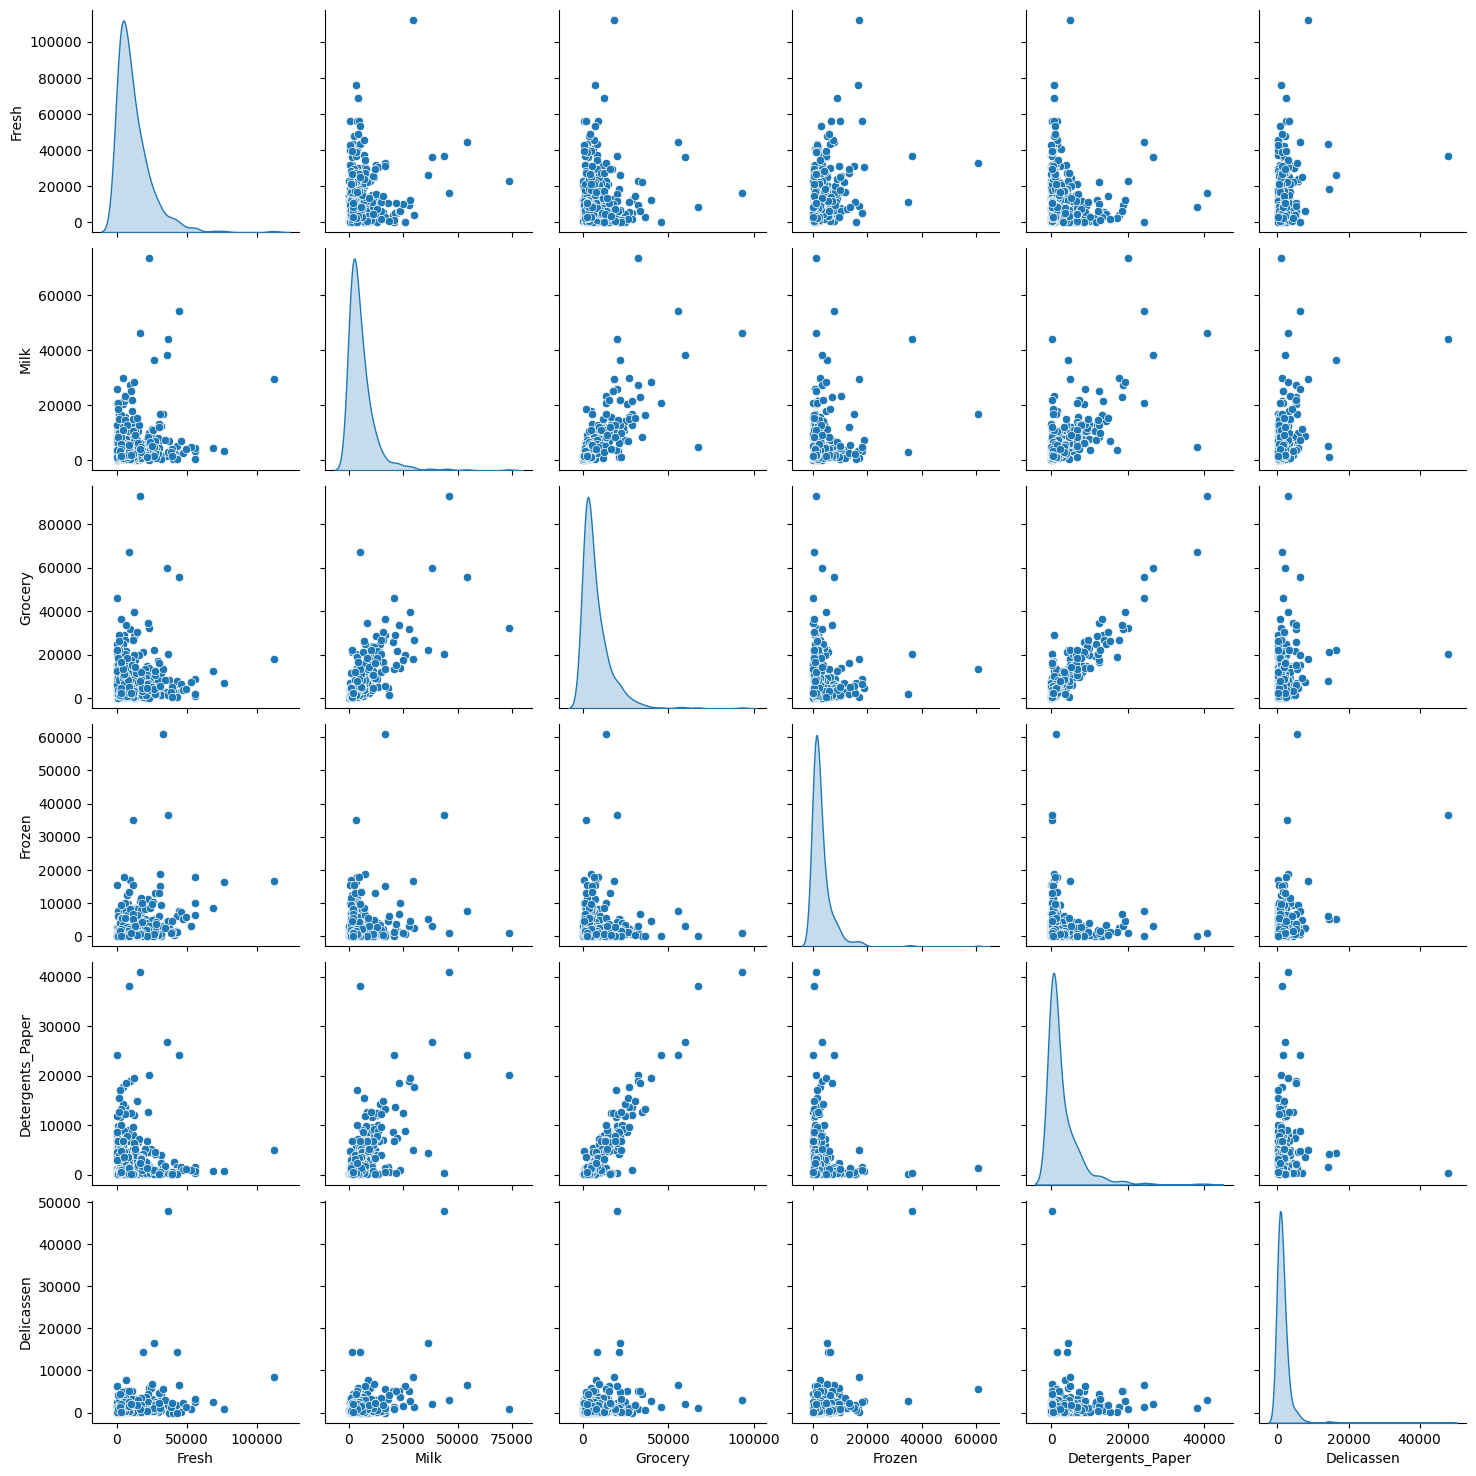

In [23]:
# Scatterplots
sns.pairplot(tab_df, kind='scatter', diag_kind='kde')
plt.show()

In [24]:
tab_df.corr() #By default uses Pearson

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


/Users/emadchelhi/miniconda3/envs/Why-anomalous/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/emadchelhi/miniconda3/envs/Why-anomalous/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/emadchelhi/miniconda3/envs/Why-anomalous/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/emadchelhi/miniconda3/envs/Why-anomalous/lib/python3.12/site-packages/seaborn/_oldcore.py:111

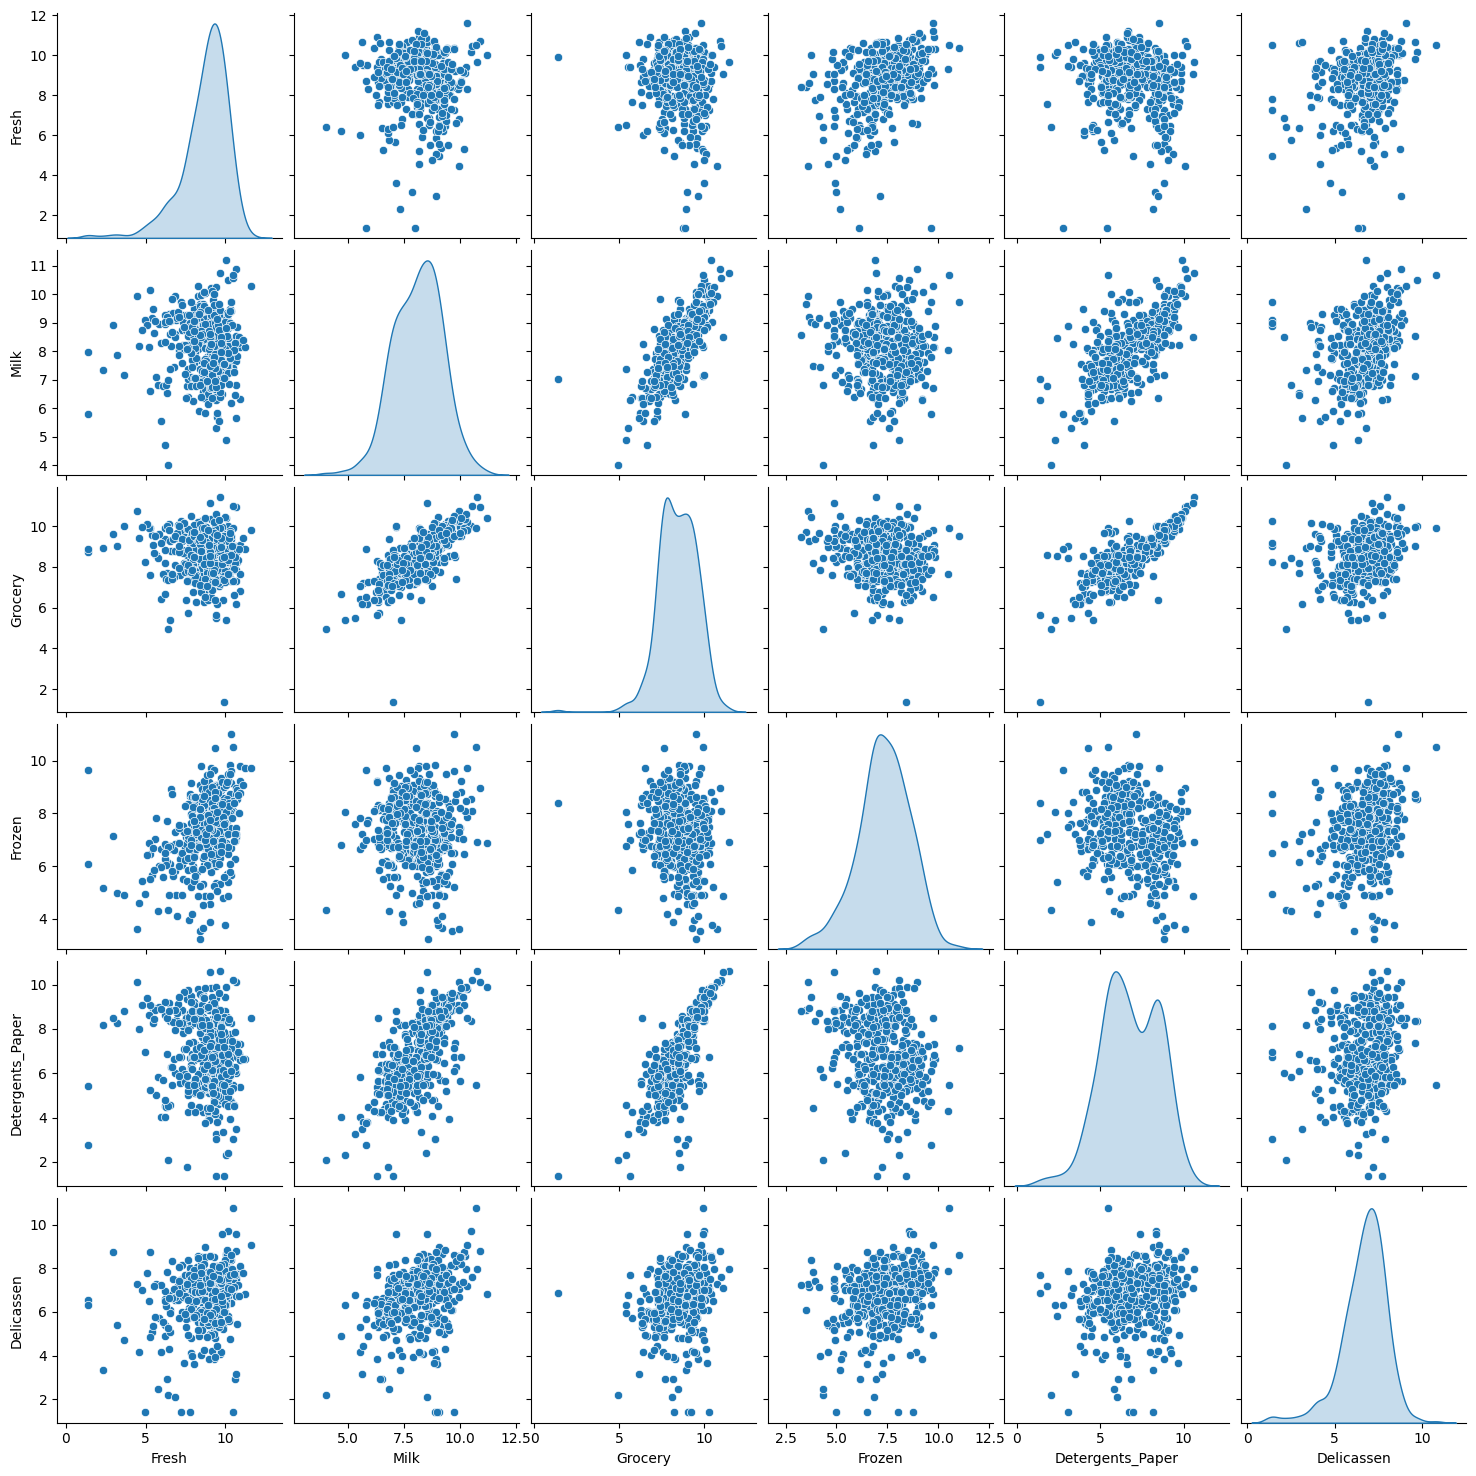

/Users/emadchelhi/miniconda3/envs/Why-anomalous/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/emadchelhi/miniconda3/envs/Why-anomalous/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/emadchelhi/miniconda3/envs/Why-anomalous/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/emadchelhi/miniconda3/envs/Why-anomalous/lib/python3.12/site-packages/seaborn/_oldcore.py:111

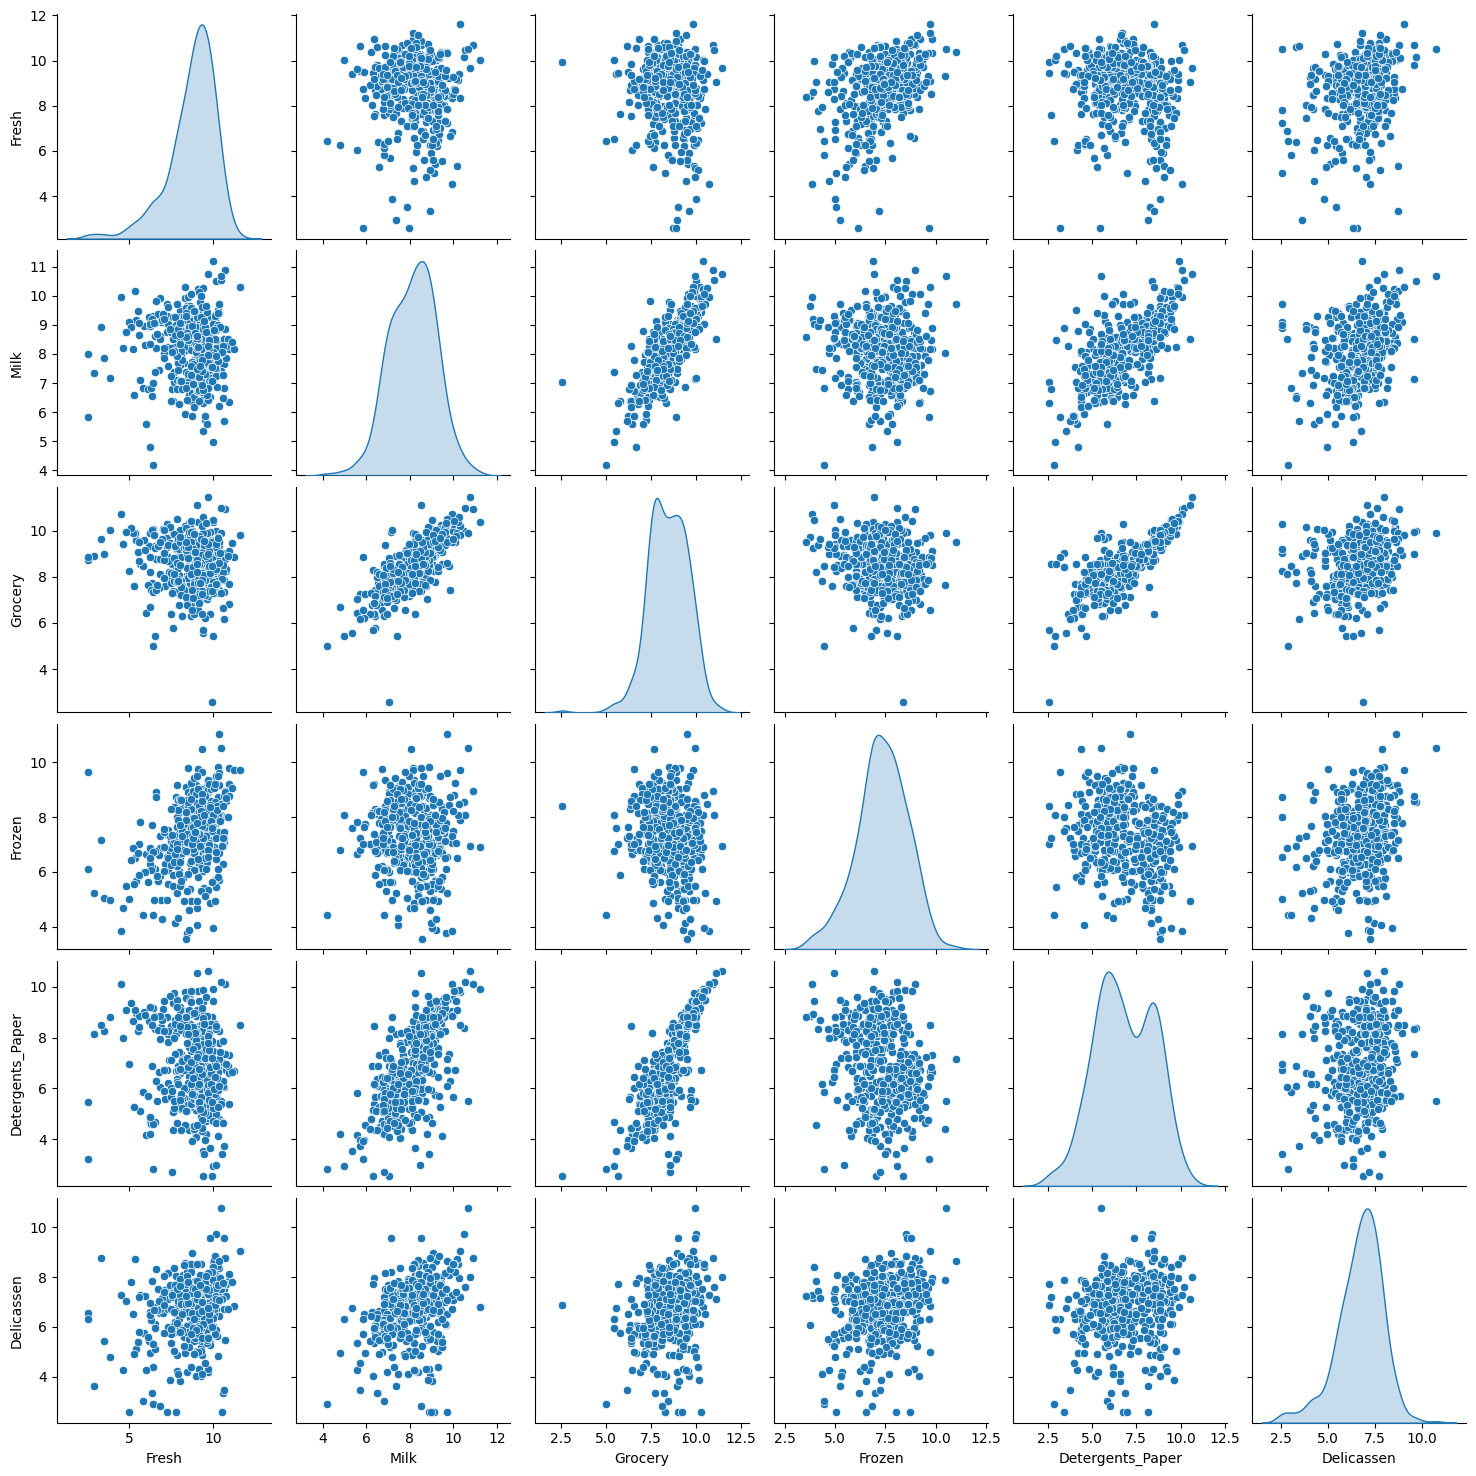

/Users/emadchelhi/miniconda3/envs/Why-anomalous/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/emadchelhi/miniconda3/envs/Why-anomalous/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/emadchelhi/miniconda3/envs/Why-anomalous/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/emadchelhi/miniconda3/envs/Why-anomalous/lib/python3.12/site-packages/seaborn/_oldcore.py:111

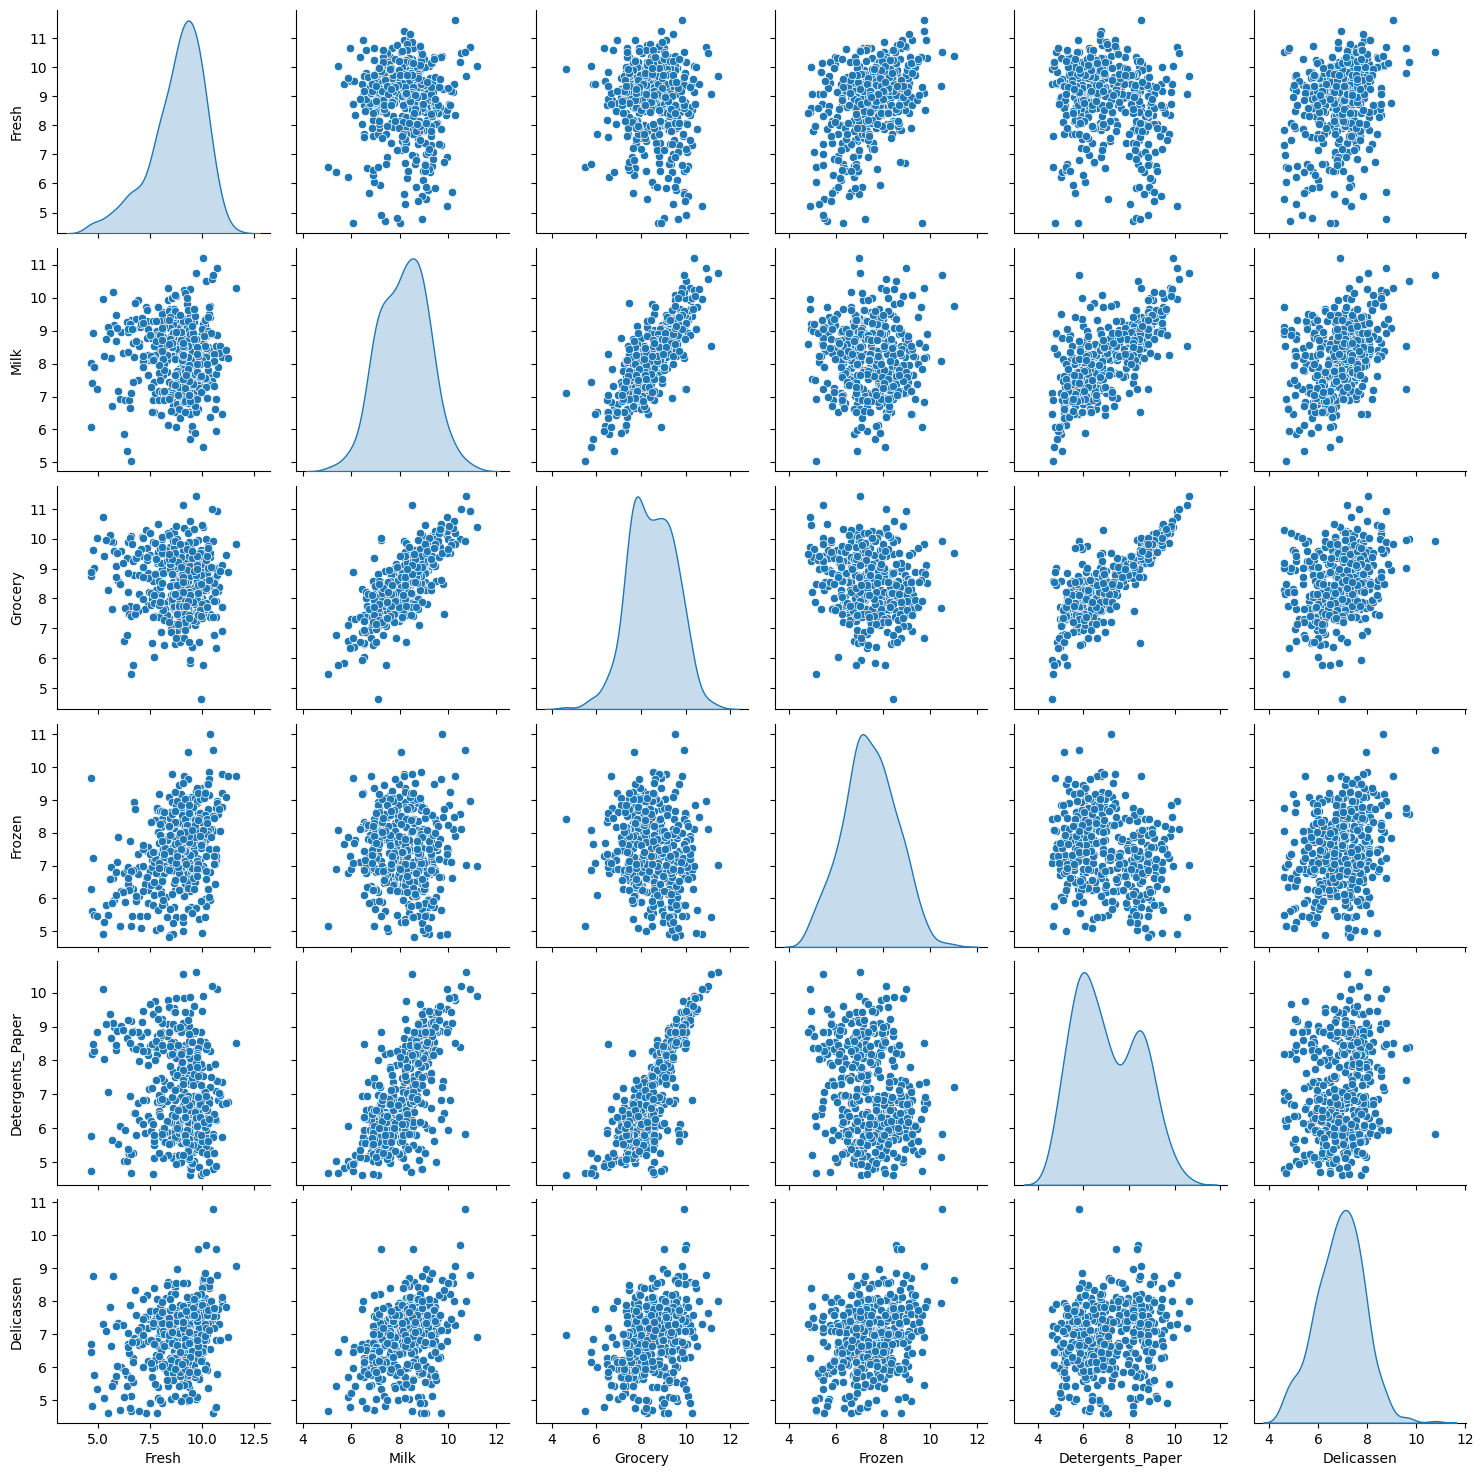

In [26]:
from sklearn.preprocessing import FunctionTransformer
from anomaly_detection import features

tab_df_1 = logarithm(tab_df, 1)
tab_df_10 = logarithm(tab_df, 10)
tab_df_100 = logarithm(tab_df, 100)

# Scatterplots
sns.pairplot(tab_df_1, kind='scatter', diag_kind='kde')
plt.show()
sns.pairplot(tab_df_10, kind='scatter', diag_kind='kde')
plt.show()
sns.pairplot(tab_df_100, kind='scatter', diag_kind='kde')
plt.show()


In [ ]:
tab_df = tab_df_100 # viasually assessed the best transformation

In [27]:
tab_df.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000
